In [1]:
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
import numpy as np
import pickle
import random
from numpy.random import seed
import time
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import pandas as pd
from secrets import randbelow

In [2]:
pickle_in = open("Xtrain96.pickle","rb")
Xtrain = pickle.load(pickle_in)

pickle_in = open("ytrain96.pickle","rb")
ytrain = pickle.load(pickle_in)

Xtrain=np.array(Xtrain/255.0)
ytrain=np.array(ytrain)

pickle_in = open("Xval96.pickle","rb")
Xval = pickle.load(pickle_in)

pickle_in = open("yval96.pickle","rb")
yval = pickle.load(pickle_in)

pickle_in = open("XTest96.pickle","rb")
Xtest = pickle.load(pickle_in)

pickle_in = open("ytest96.pickle","rb")
ytest = pickle.load(pickle_in)

pickle_in = open("Xtrain96.pickle","rb")
Xtrain2 = pickle.load(pickle_in)

pickle_in = open("ytrain96.pickle","rb")
ytrain2 = pickle.load(pickle_in)

# Genetic Algorithm

In [3]:
class GA():
    def __init__(self,popsize, iter_):
        self.popsize = popsize
        self.iter_ = iter_
        
    def popinit(self):
        population = [] 
        random.seed(99)
        fmap = [32,64,128,256] 
        kernel = [2,3,5,7]
        learningRate = [0.0001,0.0005, 0.001, 0.005] 
        dropout = [0.0,0.1,0.2,0.3,0.4,0.5]
        layer = [2,3,4,5,6]
        pool =[0,1]
        node = [64,128,256,512]
        for i in range(self.popsize):
            inPop = [random.choice(fmap),random.choice(kernel),random.choice(learningRate),random.choice(dropout),random.choice(layer),random.choice(pool),random.choice(node)]
            population.append(inPop)
        return population

        
    def fitness(self,population,X,y):
        savefit=[]
        for i in range(len(population)):
            pop = population[i]
            f = pop[0]
            k = pop[1]
            learning = pop[2]
            dropout = pop[3]
            layer = pop[4]
            pool = pop[5]
            node = pop[6]
            
            model = Sequential()
            gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.050)

            config = ConfigProto()
            config.gpu_options.per_process_gpu_memory_fraction = 0.050
            session = InteractiveSession(config=config)

            seed(99)
            tf.random.set_seed(99)
            if (pool == 0) :
                model.add(Conv2D(f, (k, k), input_shape=X.shape[1:]))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(MaxPooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model.fit(X, y,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNN.model')
                modelcnn = tf.keras.models.load_model("CNN.model")

                prediction = modelcnn.predict(Xval)
                mse = mean_squared_error(yval,prediction)
                savefit.append(mse)

            else :
                model.add(Conv2D(f,(k,k), input_shape=X.shape[1:]))
                model.add(Activation('relu'))
                model.add(AveragePooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(AveragePooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model.fit(X, y,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNN.model')
                modelcnn = tf.keras.models.load_model("CNN.model")
        
                prediction = modelcnn.predict(Xval)
                mse = mean_squared_error(yval,prediction)
                savefit.append(mse)

        return savefit
    
    def fitmutation(self,mut,X,y):
            pop = mut
            f = pop[0]
            k = pop[1]
            learning = pop[2]
            dropout = pop[3]
            layer = pop[4]
            pool = pop[5]
            node = pop[6]
            
            model = Sequential()
            gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.050)

            config = ConfigProto()
            config.gpu_options.per_process_gpu_memory_fraction = 0.050
            session = InteractiveSession(config=config)

            seed(99)
            tf.random.set_seed(99)
            if (pool == 0) :
                model.add(Conv2D(f, (k, k), input_shape=X.shape[1:]))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(MaxPooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model.fit(X, y,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNNmut.model')
                modelcnn = tf.keras.models.load_model("CNNmut.model")

                prediction = modelcnn.predict(Xval)
                mse = mean_squared_error(yval,prediction)
                fitmut = mse

            else :
                model.add(Conv2D(f,(k,k), input_shape=X.shape[1:]))
                model.add(Activation('relu'))
                model.add(AveragePooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(AveragePooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model.fit(X, y,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNNmut.model')
                modelcnn = tf.keras.models.load_model("CNNmut.model")
        
                prediction = modelcnn.predict(Xval)
                mse = mean_squared_error(yval,prediction)
                fitmut = mse
            return fitmut
        
    
    def parent_select(self,population, fitness):
        sumfit = np.sum(fitness)
        prob=[]
        parent_1=[]
        random.seed(99)
        for i in range(len(fitness)):
            tmp = fitness[i]/sumfit
            prob.append(tmp)
        prob_range = []
        sum_ = 0
        for i in range(len(prob)):
                sum_ += prob[i]
                prob_range.append(sum_)
        for i in range(len(prob)):
                rand = random.random()
                if rand <= prob_range[i]:
                    parent_1 = population[i]
                    break
        # select second parent
        parent_2 = parent_1
        while (parent_2 == parent_1):
                for i in range(len(prob)):
                    rand = random.random()
                    if rand <= prob_range[i]:
                        parent_2 = population[i]
                        break
        return parent_1, parent_2
    
    def cross_over(self,parent1, parent2):
        random.seed(99)
        crosspoint = random.randrange(0,6)
        child1 = parent1[:crosspoint+1] + parent2[crosspoint+1:]
        child2 = parent2[:crosspoint+1] + parent1[crosspoint+1:] 
        return child1, child2
    
    def mutation(self,child1, child2):
        import copy
        random.seed(99)
        tmp1 = copy.deepcopy(child1)
        tmp2 = copy.deepcopy(child2)
        fmap = [32,64,128,256] 
        kernel = [2,3,5,7]
        learningRate = [0.0001,0.0005, 0.001, 0.005] 
        dropout = [0.0,0.1,0.2,0.3,0.4,0.5]
        layer = [2,3,4,5,6]
        pool =[0,1]
        node = [64,128,256,512]
        for i in range(len(tmp1)):    
            if (i == 0) :
                prob = random.random()
                if (prob<=0.05) :
                    tmp1[point] = random.choice(fmap)
                    tmp2[point] = random.choice(fmap)
            elif (i ==1):
                prob = random.random()
                if (prob<=0.05) :
                    tmp1[point] = random.choice(kernel)
                    tmp2[point] = random.choice(kernel)
            elif (i == 2) :
                prob = random.random()
                if (prob<=0.05) :
                    tmp1[point] = random.choice(learningRate)
                    tmp2[point] = random.choice(learningRate)
            elif (i == 3) :
                prob = random.random()
                if (prob<=0.05) :
                    tmp1[point] = random.choice(dropout)
                    tmp2[point] = random.choice(dropout)
            elif (i == 4) :
                prob = random.random()
                if (prob<=0.05) :
                    tmp1[point] = random.choice(layer)
                    tmp2[point] = random.choice(layer)
            elif (i == 5) :
                prob = random.random()
                if (prob<=0.05) :
                    tmp1[point] = random.choice(pool)
                    tmp2[point] = random.choice(pool)
            else :
                prob = random.random()
                if (prob<=0.05) :
                    tmp1[point] = random.choice(node)
                    tmp2[point] = random.choice(node)
        return tmp1, tmp2
       
    def sort(self, population, fitness):
        tmp_dict = {'population' : population,'fitness': fitness }
        df = pd.DataFrame(tmp_dict)
        df.sort_values('fitness', ascending=True, inplace=True)
        new_pop = df['population'].values.tolist()
        fit = df['fitness'].values.tolist()
        return new_pop, fit
    
    def newfit(self,mut1,mut2,listindividu,X,y) :
        tmpmut=[]
        tmpfit1=0.0
        tmpfit2=0.0
        tmpmut.append(mut1)
        tmpmut.append(mut2)
        for i in listindividu:
            if i[0] == mut1 :
                tmpfit1  = (i[1])
            if i[0] == mut2 :
                tmpfit2 = (i[1])
        if (tmpfit1)==0.0 and (tmpfit2)==0.0 :
            fitness = self.fitness(tmpmut,X,y)
            fit1 = fitness[0]
            fit2 = fitness[1]
        elif (tmpfit1)==0.0 :
            fit1 = self.fitmutation(mut1,X,y)
            fit2 = tmpfit2
        else :
            fit1= tmpfit1
            fit2 = self.fitmutation(mut2,X,y)
        return fit1,fit2
                        
    
    def fit(self,X,y):
        pop = self.popinit()
        fitness = self.fitness(pop,X,y)
        listindividu =[]
        for i in range(len(pop)):
            a = pop[i]
            b = fitness[i]
            temp=[a,b]
            listindividu.append(temp)
        print(pop)
        print(fitness)
        bestingen =[]
        index = np.argmin(fitness)
        popgen = pop[index]
        fitgen = fitness[index]
        bestingen.append('Generasi 0')
        bestingen.append(popgen)
        bestingen.append(fitgen)
        for i in range(self.iter_):
            print( 'Generasi Ke ' , i+1 )
            parent_1, parent_2 = self.parent_select(pop, fitness)
            print('Parent 1 dan 2 ', parent_1, parent_2)
            child_1, child_2 = self.cross_over(parent_1, parent_2)
            print('Child 1 dan 2', child_1, child_2 )
            mut1, mut2 = self.mutation(child_1, child_2)
            print('Mutasi 1 dan 2', mut1, mut2)
            pop, fitness = self.sort(pop,fitness)
            fitmut1,fitmut2 = self.newfit(mut1,mut2,listindividu,X,y)
            pop[-1] = mut1; pop[-2] = mut2
            fitness[-1] = fitmut1 ; fitness[-2] = fitmut2
            mutt=[]
            mutt.append(mut1)
            mutt.append(mut2)
            fitmut=[]
            fitmut.append(fitmut1)
            fitmut.append(fitmut2)
            update=[]
            for i in range(len(mutt)) :
                a = mutt[i]
                b = fitmut[i]
                temp=[a,b]
                update.append(temp)
            listindividu.extend(update)
            print(pop)
            print(fitness)
            index = np.argmin(fitness)
            popgen = pop[index]
            fitgen = fitness[index]
            bestingen.append(popgen)
            bestingen.append(fitgen)
        idx_ = np.argmin(fitness)
        best_pop = pop[idx_]
        return  best_pop,bestingen

In [4]:
featSelection = GA( popsize=10, iter_=20)

In [5]:
feat,besteverygen = featSelection.fit(Xtrain,ytrain)

Epoch 1/10
66/66 [==============================] - 300s 93ms/step - loss: 0.8433 - accuracy: 0.5155 - val_loss: 0.6901 - val_accuracy: 0.5078
Epoch 2/10
66/66 [==============================] - 3s 50ms/step - loss: 0.6875 - accuracy: 0.5399 - val_loss: 0.5910 - val_accuracy: 0.6913
Epoch 3/10
66/66 [==============================] - 3s 50ms/step - loss: 0.5965 - accuracy: 0.6800 - val_loss: 0.5518 - val_accuracy: 0.7494
Epoch 4/10
66/66 [==============================] - 3s 50ms/step - loss: 0.5478 - accuracy: 0.7238 - val_loss: 0.5096 - val_accuracy: 0.7562
Epoch 5/10
66/66 [==============================] - 3s 50ms/step - loss: 0.5293 - accuracy: 0.7480 - val_loss: 0.5272 - val_accuracy: 0.7942
Epoch 6/10
66/66 [==============================] - 3s 50ms/step - loss: 0.4956 - accuracy: 0.7751 - val_loss: 0.4422 - val_accuracy: 0.7964
Epoch 7/10
66/66 [==============================] - 3s 50ms/step - loss: 0.4352 - accuracy: 0.8080 - val_loss: 0.4220 - val_accuracy: 0.8210
Epoch 8/10


D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 5s 47ms/step - loss: 0.6939 - accuracy: 0.5222 - val_loss: 0.6924 - val_accuracy: 0.5011
Epoch 2/10
66/66 [==============================] - 1s 8ms/step - loss: 0.6949 - accuracy: 0.4720 - val_loss: 0.6930 - val_accuracy: 0.5011
Epoch 3/10
66/66 [==============================] - 0s 8ms/step - loss: 0.6934 - accuracy: 0.5074 - val_loss: 0.6935 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6944 - accuracy: 0.5113 - val_loss: 0.6936 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 8ms/step - loss: 0.6936 - accuracy: 0.5150 - val_loss: 0.6928 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 0s 8ms/step - loss: 0.6929 - accuracy: 0.5432 - val_loss: 0.6928 - val_accuracy: 0.5481
Epoch 7/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6938 - accuracy: 0.5485 - val_loss: 0.6938 - val_accuracy: 0.4989
Epoch 8/10
66/66 [=

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 6s 51ms/step - loss: 0.6993 - accuracy: 0.4972 - val_loss: 0.6911 - val_accuracy: 0.5280
Epoch 2/10
66/66 [==============================] - 1s 11ms/step - loss: 0.6833 - accuracy: 0.5562 - val_loss: 0.6055 - val_accuracy: 0.6846
Epoch 3/10
66/66 [==============================] - 1s 11ms/step - loss: 0.6074 - accuracy: 0.6761 - val_loss: 0.5956 - val_accuracy: 0.7092
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5558 - accuracy: 0.7121 - val_loss: 0.5290 - val_accuracy: 0.7584
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4978 - accuracy: 0.7776 - val_loss: 0.5595 - val_accuracy: 0.7517
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4756 - accuracy: 0.7995 - val_loss: 0.4654 - val_accuracy: 0.7942
Epoch 7/10
66/66 [==============================] - 1s 11ms/step - loss: 0.4147 - accuracy: 0.8123 - val_loss: 0.6045 - val_accuracy: 0.7383
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 10s 96ms/step - loss: 0.6968 - accuracy: 0.4650 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 2s 33ms/step - loss: 0.6931 - accuracy: 0.5213 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 2s 33ms/step - loss: 0.6935 - accuracy: 0.4961 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 2s 33ms/step - loss: 0.6934 - accuracy: 0.5114 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 2s 33ms/step - loss: 0.6931 - accuracy: 0.5091 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 2s 33ms/step - loss: 0.6932 - accuracy: 0.5034 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 2s 33ms/step - loss: 0.6928 - accuracy: 0.5287 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 8/10
6

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 8s 72ms/step - loss: 0.6935 - accuracy: 0.4994 - val_loss: 0.6929 - val_accuracy: 0.5123
Epoch 2/10
66/66 [==============================] - 1s 22ms/step - loss: 0.6932 - accuracy: 0.4836 - val_loss: 0.6914 - val_accuracy: 0.6040
Epoch 3/10
66/66 [==============================] - 1s 22ms/step - loss: 0.6852 - accuracy: 0.5887 - val_loss: 0.5821 - val_accuracy: 0.6890
Epoch 4/10
66/66 [==============================] - 1s 22ms/step - loss: 0.6140 - accuracy: 0.6908 - val_loss: 0.5493 - val_accuracy: 0.7248
Epoch 5/10
66/66 [==============================] - 1s 22ms/step - loss: 0.5429 - accuracy: 0.7466 - val_loss: 0.5420 - val_accuracy: 0.7383- loss:
Epoch 6/10
66/66 [==============================] - 1s 22ms/step - loss: 0.4876 - accuracy: 0.7867 - val_loss: 0.4722 - val_accuracy: 0.7875
Epoch 7/10
66/66 [==============================] - 1s 22ms/step - loss: 0.4312 - accuracy: 0.8112 - val_loss: 0.4481 - val_accuracy: 0.7942
Epoch 

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 8s 68ms/step - loss: 0.6932 - accuracy: 0.4933 - val_loss: 0.6917 - val_accuracy: 0.6980
Epoch 2/10
66/66 [==============================] - 1s 11ms/step - loss: 0.6920 - accuracy: 0.5513 - val_loss: 0.6876 - val_accuracy: 0.6532
Epoch 3/10
66/66 [==============================] - 1s 11ms/step - loss: 0.6826 - accuracy: 0.5884 - val_loss: 0.6129 - val_accuracy: 0.6846
Epoch 4/10
66/66 [==============================] - 1s 11ms/step - loss: 0.5882 - accuracy: 0.6920 - val_loss: 0.5294 - val_accuracy: 0.7450
Epoch 5/10
66/66 [==============================] - 1s 11ms/step - loss: 0.5467 - accuracy: 0.7343 - val_loss: 0.5142 - val_accuracy: 0.7450
Epoch 6/10
66/66 [==============================] - 1s 11ms/step - loss: 0.4759 - accuracy: 0.7860 - val_loss: 0.4612 - val_accuracy: 0.8009
Epoch 7/10
66/66 [==============================] - 1s 11ms/step - loss: 0.4530 - accuracy: 0.7878 - val_loss: 0.4532 - val_accuracy: 0.8031
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 4s 35ms/step - loss: 0.6886 - accuracy: 0.5505 - val_loss: 0.6580 - val_accuracy: 0.5794
Epoch 2/10
66/66 [==============================] - 0s 6ms/step - loss: 0.6651 - accuracy: 0.5937 - val_loss: 0.6601 - val_accuracy: 0.6152
Epoch 3/10
66/66 [==============================] - 0s 6ms/step - loss: 0.5895 - accuracy: 0.6991 - val_loss: 0.5390 - val_accuracy: 0.6846
Epoch 4/10
66/66 [==============================] - 0s 6ms/step - loss: 0.5129 - accuracy: 0.7618 - val_loss: 0.4690 - val_accuracy: 0.7852
Epoch 5/10
66/66 [==============================] - 0s 6ms/step - loss: 0.4931 - accuracy: 0.7748 - val_loss: 0.4714 - val_accuracy: 0.7808
Epoch 6/10
66/66 [==============================] - 0s 6ms/step - loss: 0.4966 - accuracy: 0.7688 - val_loss: 0.5271 - val_accuracy: 0.7293
Epoch 7/10
66/66 [==============================] - 0s 6ms/step - loss: 0.4023 - accuracy: 0.8059 - val_loss: 0.3696 - val_accuracy: 0.8591
Epoch 8/10
66/66 [=

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6857 - accuracy: 0.5606 - val_loss: 0.6363 - val_accuracy: 0.7271
Epoch 2/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6350 - accuracy: 0.6669 - val_loss: 0.5704 - val_accuracy: 0.7315
Epoch 3/10
66/66 [==============================] - 0s 7ms/step - loss: 0.5783 - accuracy: 0.6628 - val_loss: 0.5632 - val_accuracy: 0.6779
Epoch 4/10
66/66 [==============================] - 0s 7ms/step - loss: 0.5158 - accuracy: 0.7386 - val_loss: 0.5013 - val_accuracy: 0.7606
Epoch 5/10
66/66 [==============================] - 0s 7ms/step - loss: 0.4862 - accuracy: 0.7748 - val_loss: 0.4696 - val_accuracy: 0.7875
Epoch 6/10
66/66 [==============================] - 0s 7ms/step - loss: 0.4839 - accuracy: 0.7777 - val_loss: 0.4338 - val_accuracy: 0.8188
Epoch 7/10
66/66 [==============================] - 0s 7ms/step - loss: 0.4330 - accuracy: 0.7913 - val_loss: 0.4019 - val_accuracy: 0.8568
Epoch 8/10
66/66 [=

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 4s 40ms/step - loss: 0.6890 - accuracy: 0.5399 - val_loss: 0.6484 - val_accuracy: 0.7002
Epoch 2/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6386 - accuracy: 0.6420 - val_loss: 0.5589 - val_accuracy: 0.7293
Epoch 3/10
66/66 [==============================] - 0s 7ms/step - loss: 0.5470 - accuracy: 0.7401 - val_loss: 0.5057 - val_accuracy: 0.7405
Epoch 4/10
66/66 [==============================] - 0s 7ms/step - loss: 0.4762 - accuracy: 0.7794 - val_loss: 0.4527 - val_accuracy: 0.7987
Epoch 5/10
66/66 [==============================] - 0s 7ms/step - loss: 0.4335 - accuracy: 0.8068 - val_loss: 0.4010 - val_accuracy: 0.8389
Epoch 6/10
66/66 [==============================] - 0s 7ms/step - loss: 0.4026 - accuracy: 0.8456 - val_loss: 0.4220 - val_accuracy: 0.8210
Epoch 7/10
66/66 [==============================] - 0s 7ms/step - loss: 0.3739 - accuracy: 0.8351 - val_loss: 0.3205 - val_accuracy: 0.8971
Epoch 8/10
66/66 [=

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 4s 39ms/step - loss: 12.5955 - accuracy: 0.5113 - val_loss: 0.6932 - val_accuracy: 0.5011
Epoch 2/10
66/66 [==============================] - 1s 18ms/step - loss: 0.6948 - accuracy: 0.4713 - val_loss: 0.6931 - val_accuracy: 0.5011
Epoch 3/10
66/66 [==============================] - 1s 18ms/step - loss: 0.6936 - accuracy: 0.4500 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 18ms/step - loss: 0.6936 - accuracy: 0.5114 - val_loss: 0.6934 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 18ms/step - loss: 0.6932 - accuracy: 0.5091 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 18ms/step - loss: 0.6932 - accuracy: 0.4813 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 18ms/step - loss: 0.6928 - accuracy: 0.5287 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 8/10
6

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 20ms/step - loss: 0.6933 - accuracy: 0.5127 - val_loss: 0.6926 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6938 - accuracy: 0.4927 - val_loss: 0.6929 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6931 - accuracy: 0.5047 - val_loss: 0.7014 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6852 - accuracy: 0.5733 - val_loss: 0.6664 - val_accuracy: 0.5414
Epoch 5/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6457 - accuracy: 0.6276 - val_loss: 0.5566 - val_accuracy: 0.7271
Epoch 6/10
66/66 [==============================] - 1s 9ms/step - loss: 0.5038 - accuracy: 0.7954 - val_loss: 0.3199 - val_accuracy: 0.8725
Epoch 7/10
66/66 [==============================] - 1s 9ms/step - loss: 0.3406 - accuracy: 0.8800 - val_loss: 0.3523 - val_accuracy: 0.8456
Epoch 8/10
66/66 [===========

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 2s 26ms/step - loss: 0.6907 - accuracy: 0.5169 - val_loss: 0.6634 - val_accuracy: 0.7159
Epoch 2/10
66/66 [==============================] - 2s 23ms/step - loss: 0.6421 - accuracy: 0.6449 - val_loss: 0.5893 - val_accuracy: 0.7293 0s - loss: 0.6502 - accu
Epoch 3/10
66/66 [==============================] - 2s 23ms/step - loss: 0.5113 - accuracy: 0.7448 - val_loss: 0.4615 - val_accuracy: 0.7919
Epoch 4/10
66/66 [==============================] - 2s 23ms/step - loss: 0.4612 - accuracy: 0.7904 - val_loss: 0.4428 - val_accuracy: 0.8210
Epoch 5/10
66/66 [==============================] - 2s 23ms/step - loss: 0.4354 - accuracy: 0.8087 - val_loss: 0.4232 - val_accuracy: 0.8412: 0.4375 - accuracy: 
Epoch 6/10
66/66 [==============================] - 2s 23ms/step - loss: 0.3893 - accuracy: 0.8503 - val_loss: 0.3472 - val_accuracy: 0.8658
Epoch 7/10
66/66 [==============================] - 2s 23ms/step - loss: 0.3299 - accuracy: 0.8584 - val_los

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 14ms/step - loss: 0.6916 - accuracy: 0.5338 - val_loss: 0.6774 - val_accuracy: 0.6174
Epoch 2/10
66/66 [==============================] - 1s 11ms/step - loss: 0.6768 - accuracy: 0.5703 - val_loss: 0.6115 - val_accuracy: 0.7204
Epoch 3/10
66/66 [==============================] - 1s 11ms/step - loss: 0.6176 - accuracy: 0.6653 - val_loss: 0.5313 - val_accuracy: 0.7427
Epoch 4/10
66/66 [==============================] - 1s 11ms/step - loss: 0.5360 - accuracy: 0.7480 - val_loss: 0.4890 - val_accuracy: 0.7875
Epoch 5/10
66/66 [==============================] - 1s 12ms/step - loss: 0.5212 - accuracy: 0.7451 - val_loss: 0.4643 - val_accuracy: 0.7987
Epoch 6/10
66/66 [==============================] - 1s 11ms/step - loss: 0.4324 - accuracy: 0.8400 - val_loss: 0.4244 - val_accuracy: 0.8412
Epoch 7/10
66/66 [==============================] - 1s 12ms/step - loss: 0.4229 - accuracy: 0.8126 - val_loss: 0.3944 - val_accuracy: 0.8300
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 2s 23ms/step - loss: 0.6937 - accuracy: 0.5019 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 13ms/step - loss: 0.6930 - accuracy: 0.5213 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 3/10
66/66 [==============================] - 1s 13ms/step - loss: 0.6933 - accuracy: 0.4932 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 13ms/step - loss: 0.6932 - accuracy: 0.5114 - val_loss: 0.6933 - val_accuracy: 0.4989
Epoch 5/10
66/66 [==============================] - 1s 13ms/step - loss: 0.6931 - accuracy: 0.5091 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 6/10
66/66 [==============================] - 1s 13ms/step - loss: 0.6932 - accuracy: 0.5034 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 7/10
66/66 [==============================] - 1s 13ms/step - loss: 0.7303 - accuracy: 0.5232 - val_loss: 0.6931 - val_accuracy: 0.5011
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 2s 14ms/step - loss: 0.6917 - accuracy: 0.5392 - val_loss: 0.6851 - val_accuracy: 0.5011
Epoch 2/10
66/66 [==============================] - 1s 12ms/step - loss: 0.6884 - accuracy: 0.5167 - val_loss: 0.6602 - val_accuracy: 0.6443
Epoch 3/10
66/66 [==============================] - 1s 12ms/step - loss: 0.6511 - accuracy: 0.5978 - val_loss: 0.5658 - val_accuracy: 0.7204
Epoch 4/10
66/66 [==============================] - 1s 11ms/step - loss: 0.5652 - accuracy: 0.6967 - val_loss: 0.4885 - val_accuracy: 0.7696
Epoch 5/10
66/66 [==============================] - 1s 11ms/step - loss: 0.4896 - accuracy: 0.7829 - val_loss: 0.4565 - val_accuracy: 0.8121
Epoch 6/10
66/66 [==============================] - 1s 11ms/step - loss: 0.4555 - accuracy: 0.8203 - val_loss: 0.4105 - val_accuracy: 0.8412
Epoch 7/10
66/66 [==============================] - 1s 12ms/step - loss: 0.4157 - accuracy: 0.8256 - val_loss: 0.4020 - val_accuracy: 0.8233
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 29ms/step - loss: 0.6935 - accuracy: 0.4960 - val_loss: 0.6926 - val_accuracy: 0.5011
Epoch 2/10
66/66 [==============================] - 2s 24ms/step - loss: 0.6929 - accuracy: 0.4893 - val_loss: 0.6578 - val_accuracy: 0.5302
Epoch 3/10
66/66 [==============================] - 2s 24ms/step - loss: 0.6483 - accuracy: 0.6263 - val_loss: 0.5471 - val_accuracy: 0.7226
Epoch 4/10
66/66 [==============================] - 2s 24ms/step - loss: 0.5718 - accuracy: 0.7123 - val_loss: 0.5387 - val_accuracy: 0.7405
Epoch 5/10
66/66 [==============================] - 2s 24ms/step - loss: 0.5180 - accuracy: 0.7555 - val_loss: 0.5464 - val_accuracy: 0.7338
Epoch 6/10
66/66 [==============================] - 2s 24ms/step - loss: 0.4890 - accuracy: 0.7845 - val_loss: 0.4537 - val_accuracy: 0.7942 0s - l
Epoch 7/10
66/66 [==============================] - 2s 24ms/step - loss: 0.4313 - accuracy: 0.8046 - val_loss: 0.4687 - val_accuracy: 0.7808
Epoch 8/10
66/66 

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 15ms/step - loss: 0.6932 - accuracy: 0.4919 - val_loss: 0.6920 - val_accuracy: 0.5570
Epoch 2/10
66/66 [==============================] - 1s 12ms/step - loss: 0.6927 - accuracy: 0.5120 - val_loss: 0.6898 - val_accuracy: 0.5168
Epoch 3/10
66/66 [==============================] - 1s 12ms/step - loss: 0.6871 - accuracy: 0.5741 - val_loss: 0.6081 - val_accuracy: 0.7136
Epoch 4/10
66/66 [==============================] - 1s 12ms/step - loss: 0.6019 - accuracy: 0.6890 - val_loss: 0.5500 - val_accuracy: 0.7092
Epoch 5/10
66/66 [==============================] - 1s 12ms/step - loss: 0.5497 - accuracy: 0.7459 - val_loss: 0.5289 - val_accuracy: 0.7226
Epoch 6/10
66/66 [==============================] - 1s 12ms/step - loss: 0.4806 - accuracy: 0.8004 - val_loss: 0.4598 - val_accuracy: 0.7942
Epoch 7/10
66/66 [==============================] - 1s 12ms/step - loss: 0.4534 - accuracy: 0.7845 - val_loss: 0.4396 - val_accuracy: 0.8098
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 16ms/step - loss: 0.6916 - accuracy: 0.5469 - val_loss: 0.6741 - val_accuracy: 0.5772
Epoch 2/10
66/66 [==============================] - 1s 11ms/step - loss: 0.6674 - accuracy: 0.6053 - val_loss: 0.5785 - val_accuracy: 0.7114
Epoch 3/10
66/66 [==============================] - 1s 12ms/step - loss: 0.5899 - accuracy: 0.6857 - val_loss: 0.5167 - val_accuracy: 0.7584
Epoch 4/10
66/66 [==============================] - 1s 12ms/step - loss: 0.5000 - accuracy: 0.7589 - val_loss: 0.4717 - val_accuracy: 0.8054
Epoch 5/10
66/66 [==============================] - 1s 11ms/step - loss: 0.4475 - accuracy: 0.8196 - val_loss: 0.4159 - val_accuracy: 0.8523
Epoch 6/10
66/66 [==============================] - 1s 11ms/step - loss: 0.4211 - accuracy: 0.8288 - val_loss: 0.3692 - val_accuracy: 0.8702
Epoch 7/10
66/66 [==============================] - 1s 11ms/step - loss: 0.3653 - accuracy: 0.8495 - val_loss: 0.3298 - val_accuracy: 0.8926
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 3s 29ms/step - loss: 0.6930 - accuracy: 0.4987 - val_loss: 0.6912 - val_accuracy: 0.5168
Epoch 2/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6922 - accuracy: 0.5125 - val_loss: 0.6840 - val_accuracy: 0.5369
Epoch 3/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6742 - accuracy: 0.5877 - val_loss: 0.6258 - val_accuracy: 0.6130
Epoch 4/10
66/66 [==============================] - 1s 9ms/step - loss: 0.5777 - accuracy: 0.6898 - val_loss: 0.5403 - val_accuracy: 0.7226
Epoch 5/10
66/66 [==============================] - 1s 9ms/step - loss: 0.5438 - accuracy: 0.7309 - val_loss: 0.5217 - val_accuracy: 0.7494
Epoch 6/10
66/66 [==============================] - 1s 9ms/step - loss: 0.4857 - accuracy: 0.7842 - val_loss: 0.4801 - val_accuracy: 0.7785
Epoch 7/10
66/66 [==============================] - 1s 9ms/step - loss: 0.4741 - accuracy: 0.7681 - val_loss: 0.4835 - val_accuracy: 0.7718
Epoch 8/10
66/66 [=

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 13ms/step - loss: 0.6930 - accuracy: 0.4984 - val_loss: 0.6909 - val_accuracy: 0.6957
Epoch 2/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6924 - accuracy: 0.5129 - val_loss: 0.6863 - val_accuracy: 0.6353
Epoch 3/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6779 - accuracy: 0.5756 - val_loss: 0.6308 - val_accuracy: 0.5973
Epoch 4/10
66/66 [==============================] - 1s 9ms/step - loss: 0.5769 - accuracy: 0.6903 - val_loss: 0.5288 - val_accuracy: 0.7360
Epoch 5/10
66/66 [==============================] - 1s 9ms/step - loss: 0.5474 - accuracy: 0.7298 - val_loss: 0.5178 - val_accuracy: 0.7427
Epoch 6/10
66/66 [==============================] - 1s 9ms/step - loss: 0.4804 - accuracy: 0.8011 - val_loss: 0.4712 - val_accuracy: 0.7987
Epoch 7/10
66/66 [==============================] - 1s 9ms/step - loss: 0.4723 - accuracy: 0.7609 - val_loss: 0.4677 - val_accuracy: 0.7875
Epoch 8/10
66/66 [============

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 12ms/step - loss: 0.6929 - accuracy: 0.4880 - val_loss: 0.6918 - val_accuracy: 0.5168
Epoch 2/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6918 - accuracy: 0.5519 - val_loss: 0.6887 - val_accuracy: 0.6242
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6861 - accuracy: 0.6004 - val_loss: 0.6916 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6753 - accuracy: 0.5741 - val_loss: 0.6433 - val_accuracy: 0.6555
Epoch 5/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6243 - accuracy: 0.6861 - val_loss: 0.5926 - val_accuracy: 0.6868
Epoch 6/10
66/66 [==============================] - 1s 9ms/step - loss: 0.5610 - accuracy: 0.7541 - val_loss: 0.5962 - val_accuracy: 0.6913
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5536 - accuracy: 0.7323 - val_loss: 0.5560 - val_accuracy: 0.7427
Epoch 8/10
66/66 [=========

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 2s 23ms/step - loss: 0.6897 - accuracy: 0.5356 - val_loss: 0.7254 - val_accuracy: 0.5078
Epoch 2/10
66/66 [==============================] - 1s 21ms/step - loss: 0.6698 - accuracy: 0.6133 - val_loss: 0.5395 - val_accuracy: 0.7204
Epoch 3/10
66/66 [==============================] - 1s 21ms/step - loss: 0.5225 - accuracy: 0.7400 - val_loss: 0.4601 - val_accuracy: 0.7852
Epoch 4/10
66/66 [==============================] - 1s 21ms/step - loss: 0.4536 - accuracy: 0.7886 - val_loss: 0.4076 - val_accuracy: 0.8367
Epoch 5/10
66/66 [==============================] - 1s 21ms/step - loss: 0.4961 - accuracy: 0.7770 - val_loss: 0.3877 - val_accuracy: 0.8702
Epoch 6/10
66/66 [==============================] - 1s 22ms/step - loss: 0.3982 - accuracy: 0.8284 - val_loss: 0.4181 - val_accuracy: 0.8188
Epoch 7/10
66/66 [==============================] - 1s 21ms/step - loss: 0.3453 - accuracy: 0.8459 - val_loss: 0.2547 - val_accuracy: 0.9105
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 16ms/step - loss: 0.6932 - accuracy: 0.4929 - val_loss: 0.6914 - val_accuracy: 0.5369
Epoch 2/10
66/66 [==============================] - 1s 13ms/step - loss: 0.6928 - accuracy: 0.5044 - val_loss: 0.6917 - val_accuracy: 0.6040
Epoch 3/10
66/66 [==============================] - 1s 14ms/step - loss: 0.6915 - accuracy: 0.5488 - val_loss: 0.7117 - val_accuracy: 0.4989
Epoch 4/10
66/66 [==============================] - 1s 13ms/step - loss: 0.6634 - accuracy: 0.5960 - val_loss: 0.5865 - val_accuracy: 0.6913
Epoch 5/10
66/66 [==============================] - 1s 13ms/step - loss: 0.6021 - accuracy: 0.6805 - val_loss: 0.5497 - val_accuracy: 0.7338
Epoch 6/10
66/66 [==============================] - 1s 13ms/step - loss: 0.5188 - accuracy: 0.7579 - val_loss: 0.4884 - val_accuracy: 0.7740
Epoch 7/10
66/66 [==============================] - 1s 13ms/step - loss: 0.4963 - accuracy: 0.7496 - val_loss: 0.4608 - val_accuracy: 0.7987
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 16ms/step - loss: 0.6932 - accuracy: 0.4900 - val_loss: 0.6918 - val_accuracy: 0.5436
Epoch 2/10
66/66 [==============================] - 1s 12ms/step - loss: 0.6928 - accuracy: 0.5037 - val_loss: 0.6906 - val_accuracy: 0.5705
Epoch 3/10
66/66 [==============================] - 1s 13ms/step - loss: 0.6888 - accuracy: 0.5780 - val_loss: 0.6239 - val_accuracy: 0.7181
Epoch 4/10
66/66 [==============================] - 1s 13ms/step - loss: 0.6079 - accuracy: 0.6709 - val_loss: 0.5476 - val_accuracy: 0.7181
Epoch 5/10
66/66 [==============================] - 1s 13ms/step - loss: 0.5653 - accuracy: 0.7159 - val_loss: 0.5347 - val_accuracy: 0.7360
Epoch 6/10
66/66 [==============================] - 1s 13ms/step - loss: 0.4788 - accuracy: 0.8110 - val_loss: 0.4569 - val_accuracy: 0.8054
Epoch 7/10
66/66 [==============================] - 1s 13ms/step - loss: 0.4552 - accuracy: 0.7896 - val_loss: 0.4425 - val_accuracy: 0.8009
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 10ms/step - loss: 0.6873 - accuracy: 0.5667 - val_loss: 0.6335 - val_accuracy: 0.7047
Epoch 2/10
66/66 [==============================] - 1s 8ms/step - loss: 0.6443 - accuracy: 0.6418 - val_loss: 0.5976 - val_accuracy: 0.6465
Epoch 3/10
66/66 [==============================] - 1s 8ms/step - loss: 0.5776 - accuracy: 0.6926 - val_loss: 0.5741 - val_accuracy: 0.6711
Epoch 4/10
66/66 [==============================] - 1s 8ms/step - loss: 0.5184 - accuracy: 0.7424 - val_loss: 0.4922 - val_accuracy: 0.7651
Epoch 5/10
66/66 [==============================] - 1s 8ms/step - loss: 0.4823 - accuracy: 0.7720 - val_loss: 0.4564 - val_accuracy: 0.7987
Epoch 6/10
66/66 [==============================] - 1s 8ms/step - loss: 0.4830 - accuracy: 0.7904 - val_loss: 0.4436 - val_accuracy: 0.7964
Epoch 7/10
66/66 [==============================] - 1s 8ms/step - loss: 0.4265 - accuracy: 0.8021 - val_loss: 0.4136 - val_accuracy: 0.8300
Epoch 8/10
66/66 [============

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 16ms/step - loss: 0.6931 - accuracy: 0.4984 - val_loss: 0.6915 - val_accuracy: 0.5145
Epoch 2/10
66/66 [==============================] - 1s 13ms/step - loss: 0.6929 - accuracy: 0.5013 - val_loss: 0.6910 - val_accuracy: 0.6555
Epoch 3/10
66/66 [==============================] - 1s 12ms/step - loss: 0.6905 - accuracy: 0.5271 - val_loss: 0.6467 - val_accuracy: 0.6197
Epoch 4/10
66/66 [==============================] - 1s 12ms/step - loss: 0.6242 - accuracy: 0.6391 - val_loss: 0.5512 - val_accuracy: 0.7383
Epoch 5/10
66/66 [==============================] - 1s 13ms/step - loss: 0.5918 - accuracy: 0.7172 - val_loss: 0.5345 - val_accuracy: 0.7427
Epoch 6/10
66/66 [==============================] - 1s 13ms/step - loss: 0.5060 - accuracy: 0.7781 - val_loss: 0.4837 - val_accuracy: 0.7852
Epoch 7/10
66/66 [==============================] - 1s 13ms/step - loss: 0.4928 - accuracy: 0.7536 - val_loss: 0.4704 - val_accuracy: 0.7852
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 12ms/step - loss: 0.6930 - accuracy: 0.4988 - val_loss: 0.6906 - val_accuracy: 0.7025
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6919 - accuracy: 0.5123 - val_loss: 0.6868 - val_accuracy: 0.6801
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6818 - accuracy: 0.5654 - val_loss: 0.5972 - val_accuracy: 0.6890
Epoch 4/10
66/66 [==============================] - 1s 11ms/step - loss: 0.5817 - accuracy: 0.6830 - val_loss: 0.5442 - val_accuracy: 0.7405
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5528 - accuracy: 0.7304 - val_loss: 0.5327 - val_accuracy: 0.7315
Epoch 6/10
66/66 [==============================] - 1s 9ms/step - loss: 0.4968 - accuracy: 0.7724 - val_loss: 0.4928 - val_accuracy: 0.7740
Epoch 7/10
66/66 [==============================] - 1s 9ms/step - loss: 0.5070 - accuracy: 0.7370 - val_loss: 0.4831 - val_accuracy: 0.7897
Epoch 8/10
66/66 [========

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 2s 19ms/step - loss: 0.6930 - accuracy: 0.4981 - val_loss: 0.6911 - val_accuracy: 0.4989
Epoch 2/10
66/66 [==============================] - 1s 13ms/step - loss: 0.6914 - accuracy: 0.5496 - val_loss: 0.6828 - val_accuracy: 0.5906
Epoch 3/10
66/66 [==============================] - 1s 15ms/step - loss: 0.6706 - accuracy: 0.6076 - val_loss: 0.6304 - val_accuracy: 0.6040
Epoch 4/10
66/66 [==============================] - 1s 13ms/step - loss: 0.5718 - accuracy: 0.6923 - val_loss: 0.5408 - val_accuracy: 0.7450
Epoch 5/10
66/66 [==============================] - 1s 13ms/step - loss: 0.5358 - accuracy: 0.7384 - val_loss: 0.5293 - val_accuracy: 0.7338
Epoch 6/10
66/66 [==============================] - 1s 13ms/step - loss: 0.4844 - accuracy: 0.7907 - val_loss: 0.4856 - val_accuracy: 0.7830
Epoch 7/10
66/66 [==============================] - 1s 13ms/step - loss: 0.4761 - accuracy: 0.7686 - val_loss: 0.4717 - val_accuracy: 0.8031
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 2s 15ms/step - loss: 0.6931 - accuracy: 0.4992 - val_loss: 0.6908 - val_accuracy: 0.5503
Epoch 2/10
66/66 [==============================] - 1s 12ms/step - loss: 0.6920 - accuracy: 0.5216 - val_loss: 0.6871 - val_accuracy: 0.6353
Epoch 3/10
66/66 [==============================] - 1s 13ms/step - loss: 0.6799 - accuracy: 0.5796 - val_loss: 0.6164 - val_accuracy: 0.6264
Epoch 4/10
66/66 [==============================] - 1s 13ms/step - loss: 0.5835 - accuracy: 0.6881 - val_loss: 0.5406 - val_accuracy: 0.7248
Epoch 5/10
66/66 [==============================] - 1s 13ms/step - loss: 0.5427 - accuracy: 0.7367 - val_loss: 0.5145 - val_accuracy: 0.7517
Epoch 6/10
66/66 [==============================] - 1s 12ms/step - loss: 0.4909 - accuracy: 0.7710 - val_loss: 0.4852 - val_accuracy: 0.7740
Epoch 7/10
66/66 [==============================] - 1s 12ms/step - loss: 0.4928 - accuracy: 0.7677 - val_loss: 0.4707 - val_accuracy: 0.8009
Epoch 8/10
66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 11ms/step - loss: 0.6855 - accuracy: 0.5505 - val_loss: 0.6361 - val_accuracy: 0.7159
Epoch 2/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6371 - accuracy: 0.6463 - val_loss: 0.5614 - val_accuracy: 0.7338
Epoch 3/10
66/66 [==============================] - 1s 8ms/step - loss: 0.5918 - accuracy: 0.6812 - val_loss: 0.5387 - val_accuracy: 0.7069
Epoch 4/10
66/66 [==============================] - 1s 9ms/step - loss: 0.5208 - accuracy: 0.7342 - val_loss: 0.4935 - val_accuracy: 0.7696
Epoch 5/10
66/66 [==============================] - 1s 9ms/step - loss: 0.5038 - accuracy: 0.7680 - val_loss: 0.4658 - val_accuracy: 0.8031
Epoch 6/10
66/66 [==============================] - 1s 9ms/step - loss: 0.4725 - accuracy: 0.7923 - val_loss: 0.4457 - val_accuracy: 0.8188
Epoch 7/10
66/66 [==============================] - 1s 9ms/step - loss: 0.4400 - accuracy: 0.7840 - val_loss: 0.4540 - val_accuracy: 0.7763
Epoch 8/10
66/66 [============

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1/10
66/66 [==============================] - 5s 44ms/step - loss: 0.6935 - accuracy: 0.4914 - val_loss: 0.6923 - val_accuracy: 0.6644
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6938 - accuracy: 0.4890 - val_loss: 0.6930 - val_accuracy: 0.5011
Epoch 3/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6931 - accuracy: 0.4661 - val_loss: 0.6802 - val_accuracy: 0.5011
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6628 - accuracy: 0.6260 - val_loss: 0.6162 - val_accuracy: 0.6779
Epoch 5/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6310 - accuracy: 0.6649 - val_loss: 0.6061 - val_accuracy: 0.6868
Epoch 6/10
66/66 [==============================] - 1s 9ms/step - loss: 0.5291 - accuracy: 0.7596 - val_loss: 0.5267 - val_accuracy: 0.7315
Epoch 7/10
66/66 [==============================] - 1s 9ms/step - loss: 0.4805 - accuracy: 0.7711 - val_loss: 0.4815 - val_accuracy: 0.7673
Epoch 8/10
66/66

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 14ms/step - loss: 0.6935 - accuracy: 0.4904 - val_loss: 0.6926 - val_accuracy: 0.5011
Epoch 2/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6938 - accuracy: 0.4785 - val_loss: 0.6919 - val_accuracy: 0.5145
Epoch 3/10
66/66 [==============================] - 1s 9ms/step - loss: 0.6853 - accuracy: 0.5898 - val_loss: 0.6621 - val_accuracy: 0.7136
Epoch 4/10
66/66 [==============================] - 1s 10ms/step - loss: 0.6253 - accuracy: 0.6969 - val_loss: 0.5570 - val_accuracy: 0.7360
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5934 - accuracy: 0.6900 - val_loss: 0.5604 - val_accuracy: 0.6935
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5045 - accuracy: 0.7841 - val_loss: 0.5672 - val_accuracy: 0.7002
Epoch 7/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4883 - accuracy: 0.7537 - val_loss: 0.4456 - val_accuracy: 0.8076
Epoch 8/10
66/66 [=======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 2s 14ms/step - loss: 0.6930 - accuracy: 0.4994 - val_loss: 0.6902 - val_accuracy: 0.5078
Epoch 2/10
66/66 [==============================] - 1s 11ms/step - loss: 0.6903 - accuracy: 0.5359 - val_loss: 0.6758 - val_accuracy: 0.5034
Epoch 3/10
66/66 [==============================] - 1s 11ms/step - loss: 0.6618 - accuracy: 0.5928 - val_loss: 0.5999 - val_accuracy: 0.6488
Epoch 4/10
66/66 [==============================] - 1s 11ms/step - loss: 0.5634 - accuracy: 0.6957 - val_loss: 0.5237 - val_accuracy: 0.7539
Epoch 5/10
66/66 [==============================] - 1s 10ms/step - loss: 0.5412 - accuracy: 0.7420 - val_loss: 0.5129 - val_accuracy: 0.7629
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.4798 - accuracy: 0.7844 - val_loss: 0.4723 - val_accuracy: 0.7852
Epoch 7/10
66/66 [==============================] - 1s 11ms/step - loss: 0.4601 - accuracy: 0.7726 - val_loss: 0.4772 - val_accuracy: 0.7673
Epoch 8/10
66/66 [======

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 11ms/step - loss: 0.6855 - accuracy: 0.5501 - val_loss: 0.6367 - val_accuracy: 0.7159
Epoch 2/10
66/66 [==============================] - 1s 8ms/step - loss: 0.6362 - accuracy: 0.6438 - val_loss: 0.5568 - val_accuracy: 0.7204
Epoch 3/10
66/66 [==============================] - 1s 8ms/step - loss: 0.5915 - accuracy: 0.6757 - val_loss: 0.5371 - val_accuracy: 0.7136
Epoch 4/10
66/66 [==============================] - 1s 9ms/step - loss: 0.5160 - accuracy: 0.7408 - val_loss: 0.4928 - val_accuracy: 0.7763
Epoch 5/10
66/66 [==============================] - 1s 9ms/step - loss: 0.5042 - accuracy: 0.7652 - val_loss: 0.4629 - val_accuracy: 0.8009
Epoch 6/10
66/66 [==============================] - 1s 8ms/step - loss: 0.4678 - accuracy: 0.8053 - val_loss: 0.4417 - val_accuracy: 0.8166
Epoch 7/10
66/66 [==============================] - 1s 9ms/step - loss: 0.4334 - accuracy: 0.7812 - val_loss: 0.4331 - val_accuracy: 0.8143
Epoch 8/10
66/66 [============

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


66/66 [==============================] - 1s 11ms/step - loss: 0.6855 - accuracy: 0.5503 - val_loss: 0.6362 - val_accuracy: 0.7226
Epoch 2/10
66/66 [==============================] - 1s 8ms/step - loss: 0.6367 - accuracy: 0.6475 - val_loss: 0.5591 - val_accuracy: 0.7338
Epoch 3/10
66/66 [==============================] - 1s 8ms/step - loss: 0.5906 - accuracy: 0.6763 - val_loss: 0.5346 - val_accuracy: 0.7114
Epoch 4/10
66/66 [==============================] - 1s 8ms/step - loss: 0.5206 - accuracy: 0.7422 - val_loss: 0.4934 - val_accuracy: 0.7651
Epoch 5/10
66/66 [==============================] - 1s 8ms/step - loss: 0.4965 - accuracy: 0.7716 - val_loss: 0.4627 - val_accuracy: 0.8054
Epoch 6/10
66/66 [==============================] - 1s 8ms/step - loss: 0.4894 - accuracy: 0.7779 - val_loss: 0.4409 - val_accuracy: 0.8098
Epoch 7/10
66/66 [==============================] - 1s 8ms/step - loss: 0.4356 - accuracy: 0.7862 - val_loss: 0.4581 - val_accuracy: 0.7763
Epoch 8/10
66/66 [============

In [6]:
feat

[32, 7, 0.0001, 0.1, 3, 1, 128]

In [7]:
besteverygen

['Generasi 0',
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.14630223406140094,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.14630223406140094,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.14630223406140094,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.14630223406140094,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.14630223406140094,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.14630223406140094,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.14630223406140094,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.14630223406140094,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.14630223406140094,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.14630223406140094,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.14630223406140094,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.14630223406140094,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.14630223406140094,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.14630223406140094,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.14630223406140094,
 [32, 5, 0.0005, 0.1, 3, 1, 128],
 0.14630223406140094,
 [32, 7, 0.0001, 0.1, 3, 1, 128],
 0.13339235694150006,
 [32, 7, 0.0001, 0.1, 3, 1, 128],

# CNN

In [8]:
            pop = feat
            f = pop[0]
            k = pop[1]
            learning = pop[2]
            dropout = pop[3]
            layer = pop[4]
            pool = pop[5]
            node = pop[6]
            
            model = Sequential()
            gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.050)

            config = ConfigProto()
            config.gpu_options.per_process_gpu_memory_fraction = 0.050
            session = InteractiveSession(config=config)

            seed(99)
            tf.random.set_seed(99)
            if (pool == 0) :
                model.add(Conv2D(f, (k, k), input_shape=Xtrain.shape[1:]))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(MaxPooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model1 = model.fit(Xtrain, ytrain ,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNNP2V2.model')

            else :
                model.add(Conv2D(f,(k,k), input_shape=Xtrain.shape[1:]))
                model.add(Activation('relu'))
                model.add(AveragePooling2D(pool_size=(2, 2)))

                for i in range(layer-1):
                    model.add(Conv2D(f, (k,k),padding='same'))
                    model.add(Activation('relu'))
                    model.add(AveragePooling2D(pool_size=(2, 2)))

                model.add(Flatten())
                
                model.add(Dense(node))
                model.add(Activation('relu'))
                model.add(Dropout(dropout))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=learning),metrics=['accuracy'])
            
                model1 = model.fit(Xtrain, ytrain,batch_size=16,epochs=10,validation_split=0.3)
                model.save('CNNP2V2.model')

Epoch 1/10
66/66 [==============================] - 272s 37ms/step - loss: 0.6855 - accuracy: 0.5523 - val_loss: 0.6371 - val_accuracy: 0.7136
Epoch 2/10
66/66 [==============================] - 0s 5ms/step - loss: 0.6367 - accuracy: 0.6462 - val_loss: 0.5598 - val_accuracy: 0.7315
Epoch 3/10
66/66 [==============================] - 0s 5ms/step - loss: 0.5925 - accuracy: 0.6756 - val_loss: 0.5387 - val_accuracy: 0.7159
Epoch 4/10
66/66 [==============================] - 0s 5ms/step - loss: 0.5212 - accuracy: 0.7407 - val_loss: 0.4966 - val_accuracy: 0.7517
Epoch 5/10
66/66 [==============================] - 0s 5ms/step - loss: 0.5000 - accuracy: 0.7617 - val_loss: 0.4679 - val_accuracy: 0.8009
Epoch 6/10
66/66 [==============================] - 0s 5ms/step - loss: 0.4953 - accuracy: 0.7763 - val_loss: 0.4501 - val_accuracy: 0.8031
Epoch 7/10
66/66 [==============================] - 0s 5ms/step - loss: 0.4396 - accuracy: 0.7754 - val_loss: 0.4535 - val_accuracy: 0.7763
Epoch 8/10
66/66 

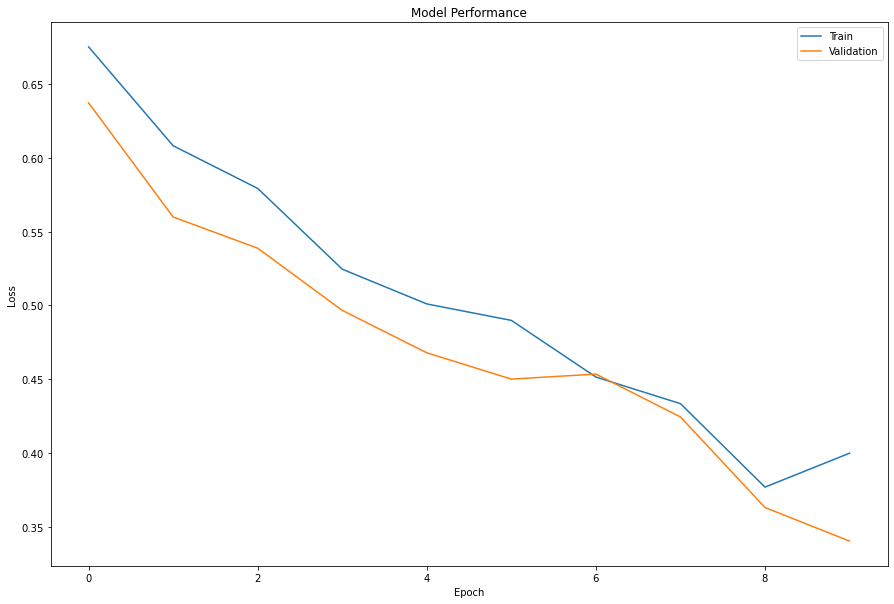

In [9]:
import matplotlib.pyplot as plt
#Loss Visualization for data training and validation

plt.figure(figsize=(15,10))
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'])
plt.title('Model Performance')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()

In [10]:
model = tf.keras.models.load_model("CNNP2V2.model")

# Data Latih

In [11]:
prediction = model.predict(Xtrain2)
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

0.828629

In [12]:
m = tf.keras.metrics.Precision()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

0.7648352

In [13]:
m = tf.keras.metrics.Recall()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

0.9443691

In [14]:
m = tf.keras.metrics.FalseNegatives()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

41.0

In [15]:
m = tf.keras.metrics.FalsePositives()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

214.0

In [16]:
m = tf.keras.metrics.TrueNegatives()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

537.0

In [17]:
m = tf.keras.metrics.TruePositives()
m.update_state(ytrain2,prediction, sample_weight=None)
m.result().numpy()

696.0

# Data Validasi

In [18]:
prediction = model.predict(Xval)
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

0.84887457

In [19]:
m = tf.keras.metrics.Precision()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

0.78918916

In [20]:
m = tf.keras.metrics.Recall()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

0.9480519

In [21]:
m = tf.keras.metrics.FalseNegatives()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

16.0

In [22]:
m = tf.keras.metrics.FalsePositives()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

78.0

In [23]:
m = tf.keras.metrics.TrueNegatives()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

236.0

In [24]:
m = tf.keras.metrics.TruePositives()
m.update_state(yval,prediction, sample_weight=None)
m.result().numpy()

292.0

# Data Uji

In [25]:
prediction = model.predict(Xtest)
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

0.6927224

In [26]:
m = tf.keras.metrics.Precision()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

0.64705884

In [27]:
m = tf.keras.metrics.Recall()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

0.8369565

In [28]:
m = tf.keras.metrics.FalseNegatives()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

30.0

In [29]:
m = tf.keras.metrics.FalsePositives()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

84.0

In [30]:
m = tf.keras.metrics.TrueNegatives()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

103.0

In [31]:
m = tf.keras.metrics.TruePositives()
m.update_state(ytest,prediction, sample_weight=None)
m.result().numpy()

154.0